In [1]:
from src.fistanet.M5FISTANet import FISTANet
from src.fistanet.loader import DataSplit
from src.fistanet.solver import Solver
from os.path import join as pjoin
from torchsummary import summary
import numpy as np
import torch

In [2]:
DATA_DIR = './data'
DATA_FILE_GEN = 'generated/BW_master_10000_2024-04-07-12-43-32.pkl'
DATA_FILE_SIGS = 'steinbrinker/testing_data_mvg_avg.npy'
DATA_FILE_BW = 'mit-bih/bw'
DICT_FILE_BW = 'steinbrinker/dictionary_BW_real_data.npy'
DATA_SIZE = 10000
BATCH_SIZE = 1000
TVT_SPLIT = {
    'train': 80,
    'valid': 10,
    'test': 10
}

FNET_LAYER_NO = 4
FNET_FEATURE_NO = 16

EPOCH_NO = 100
START_EPOCH = 0
TEST_EPOCH = 9
LR_DEC_AFTER = 100
LR_DEC_EVERY = 10

In [3]:
trn_ldr, val_ldr, tst_ldr = DataSplit(DATA_DIR, DATA_FILE_GEN, DATA_FILE_SIGS, DATA_FILE_BW, TVT_SPLIT, BATCH_SIZE)

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
Psi = np.load(pjoin(DATA_DIR, DICT_FILE_BW))
Psi = torch.from_numpy(Psi)
Psi = Psi.clone().detach().to(device=device)

In [6]:
fista_net = FISTANet(FNET_LAYER_NO, FNET_FEATURE_NO)
fista_net = fista_net.to(device)# define arguments of fista_net


In [7]:
# summary(fista_net, input_size=(1, 64, 298), device=str(device))
print('Total number of parameters fista net:',
          sum(p.numel() for p in fista_net.parameters()))

Total number of parameters fista net: 18871


In [8]:
args = {
    'model_name': 'FISTANet',
    'num_epochs': EPOCH_NO,
    'lr': 1e-3,
    'data_dir': DATA_DIR,
    'save_path': './models/FISTANet/',
    'start_epoch': START_EPOCH,
    'multi_gpu': False,
    'device': device,
    'log_interval': 2,
    'test_epoch': TEST_EPOCH,
    'lr_dec_after': LR_DEC_AFTER,
    'lr_dec_every': LR_DEC_EVERY
}

In [9]:
solver = Solver(fista_net, Psi, trn_ldr, val_ldr, BATCH_SIZE, args, tst_ldr)

Training epoch 1...

Train Epoch: 1 [0/8000 (0%)]	Batch Loss: 1097932.950075	Learning Rate (w_theta): 0.001000	 TIME:2.7s
				Disc: 1097932.950075 	Const: 885.778076		Spars: 0.009333
	 TVw: -0.501000 | TVb: -2.001000 | GSw: -0.201000 | GSb: 0.099000 | TSUw: 0.499000 | TSUb: 0.001000

Train Epoch: 1 [3200/8000 (40%)]	Batch Loss: 1182802.049227	Learning Rate (w_theta): 0.001000	 TIME:4.0s
				Disc: 1182802.049227 	Const: 985.456787		Spars: 0.011945
	 TVw: -0.502843 | TVb: -2.002836 | GSw: -0.203003 | GSb: 0.096997 | TSUw: 0.496997 | TSUb: 0.003003

Train Epoch: 1 [6400/8000 (80%)]	Batch Loss: 1066806.191693	Learning Rate (w_theta): 0.001000	 TIME:5.1s
				Disc: 1066806.191693 	Const: 890.820679		Spars: 0.014671
	 TVw: -0.504723 | TVb: -2.004642 | GSw: -0.205000 | GSb: 0.095000 | TSUw: 0.495000 | TSUb: 0.004999
Validating epoch 1...
-------------------------------------------
Epoch statistics:
Average training loss: 1119656.8203291306
Average validation loss: 484888.1828895831
Training ep

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\galiger.gergo\AppData\Local\Temp\ipykernel_80920\3719546261.py", line 1, in <module>
    solver.train()
  File "C:\Users\galiger.gergo\Desktop\ecg-denoising\workspace\src\fistanet\solver.py", line 260, in train
    test_plot(x_in, pred, y_target, '.\\testing\\valid_ep%d_btch%d.png' % (epoch, batch_idy))
  File "C:\Users\galiger.gergo\Desktop\ecg-denoising\workspace\src\fistanet\solver.py", line 32, in test_plot
    plt.savefig(file_name)
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py", line 979, in savefig
    res = fig.savefig(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py", line 3046, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backe

TypeError: object of type 'NoneType' has no len()

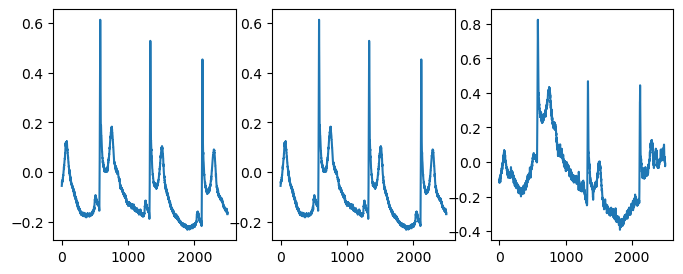

In [9]:
solver.train()